## Laptop Price Predictor

### 1) Problem statement
- This project understands how the laptop's price is affected by other variables such as Company, Product, TypeName,size, Screen resolution, Cpu, Ram ,Memory,Gpu,OpSys and Weight


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/muhammetvarl/laptop-price
- The data consists of 13 column and 1303 rows.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Importing the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('D:\\Study\\ML-Projects\\Project-2(Laptop_Price_Predictor)\\notebooks\\data\\laptop_price.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


#### Shape of the dataset

    1 Company- String -Laptop Manufacturer
    2 Product -String -Brand and Model
    3 TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.)
    4 Inches -Numeric- Screen Size
    5 ScreenResolution -String- Screen Resolution
    6 Cpu- String -Central Processing Unit (CPU)
    7 Ram -String- Laptop RAM
    8 Memory -String- Hard Disk / SSD Memory
    9 GPU -String- Graphics Processing Units (GPU)
    10 OpSys -String- Operating System
    11 Weight -String- Laptop Weight
    12 Price_euros -Numeric- Price (Euro)

### 3.1 Checking Missing values

In [4]:
df.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

#### There are no missing values in the data set

### 3.2 Checking Duplicates

In [5]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [6]:
# Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


### 3.4 Checking the number of unique values of each column

In [7]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

### 3.5 Checking statistics of data set

In [8]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


### 3.7 Exploring Data

In [9]:
df.sample(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
162,166,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 520,Windows 10,2.13kg,728.0
500,507,Asus,VivoBook E201NA,Netbook,11.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,64GB Flash Storage,Intel HD Graphics 500,Windows 10 S,1.2kg,340.0
154,157,HP,EliteBook 840,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 7500U 2.7GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.48kg,1082.0
471,478,HP,ZBook 15u,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,500GB HDD,AMD FirePro W4190M,Windows 10,1.9kg,1154.0
302,307,Lenovo,IdeaPad 320-17IKB,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,6GB,1TB HDD,Nvidia GeForce GTX 940M,Windows 10,2.8kg,649.0
969,983,Lenovo,IdeaPad 310-15IKB,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6GB,256GB SSD,Nvidia GeForce 920MX,Windows 10,2.4kg,695.0
33,34,Dell,XPS 13,Ultrabook,13.3,Touchscreen / Quad HD+ 3200x1800,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.2kg,1869.0
1167,1185,Lenovo,320-15ISK (i3-6006U/4GB/1TB/GeForce,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.2kg,468.0
1199,1217,MSI,GS73VR 7RF,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.43kg,2048.9
901,913,Asus,G701VO-IH74K (i7-6820HK/32GB/2x,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32GB,256GB SSD + 256GB SSD,Nvidia GeForce GTX 980M,Windows 10,3.58kg,1279.0


#### Removing Laptop_ID column Which has no value

In [10]:
df=df.drop('laptop_ID',axis=1)

In [11]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


#### Ram can be made as a INT type feature

In [12]:
df['Ram'] = df['Ram'].str.replace('GB','')

In [13]:
# changing data type
df['Ram'] = df['Ram'].astype(int)

#### Weight can be made as a Float type feature

In [14]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [15]:
# changing data type
df['Weight'] = df['Weight'].astype(float)

#### Price_euros need to be converted to Price_bdt

In [16]:
df['Price_euros'] = df['Price_euros']*120.53

#### Renaming required columns

In [17]:
df.rename(columns={'Ram':'Ram(GB)','Weight':'Weight(kg)','Price_euros':'Price_bdt','Inches':'Size'},inplace=True)

In [18]:
df.sample(5)

,Company,Product,TypeName,Size,ScreenResolution,Cpu,Ram(GB),Memory,Gpu,OpSys,Weight(kg),Price_bdt
640,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050M,Windows 10,2.5,133667.770
697,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2,80634.570
366,Dell,Inspiron 5770,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.8,130775.050
330,MSI,GL72M 7REX,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.7,144515.470
887,Asus,Rog GL753VD-GC082T,Gaming,17.3,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.2,165114.047


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Size              1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram(GB)           1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight(kg)        1303 non-null   float64
 11  Price_bdt         1303 non-null   float64
dtypes: float64(3), int32(1), object(8)
memory usage: 117.2+ KB


In [20]:
df.describe()

,Size,Ram(GB),Weight(kg),Price_bdt
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,135437.993092
std,1.426304,5.084665,0.665475,84251.559897
min,10.100000,2.000000,0.690000,20972.220000
25%,14.000000,4.000000,1.500000,72197.470000
50%,15.600000,8.000000,2.040000,117757.810000
75%,15.600000,8.000000,2.300000,179334.176400
max,18.400000,64.000000,4.700000,735112.470000


#### Insight
- Minimum laptop size starts from 10.1 inches and max can be 18.4 inches. Average size is 15 inches
- Minimum ram is 2 GB and maximum is 64 GB. In average laptop contains 8 GB of ram.
- Minimum Weight is 0.69 kg and maximum is 4.7 kg. In average laptops are 2.03 KG in weight.
- Laptop price starts from 20972.22 BDT and goes maximum 735112 BDT.

### 4. Exploring Data ( Visualization )
#### 4.1 Visualization of average score distribution to make some conclusion. 
- Countplot
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Countplot

#### Laptop companies in the dataset

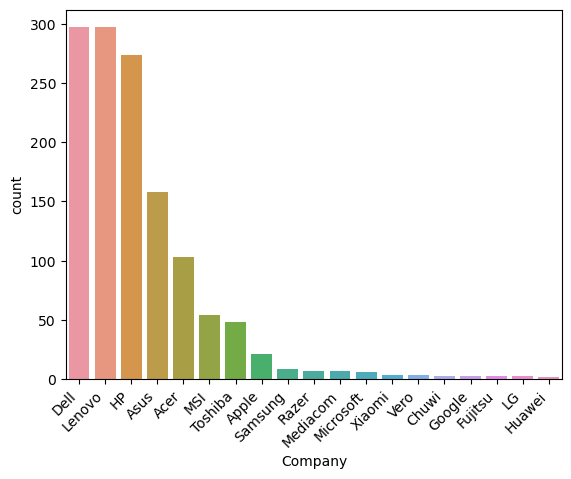

In [21]:
sns.countplot(x='Company', data=df, order=df['Company'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

#### Types of laptops are in the dataset

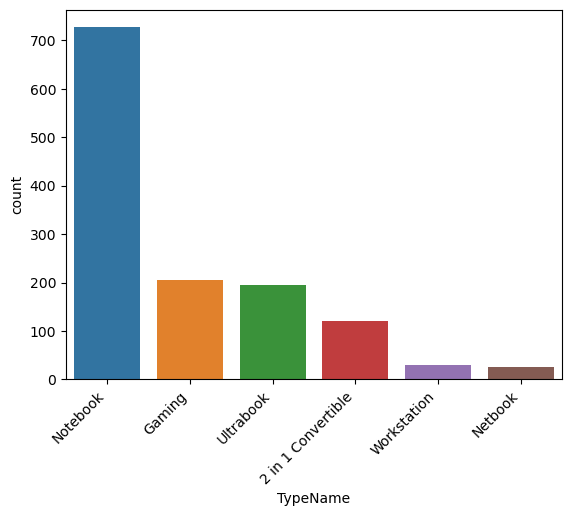

In [22]:
sns.countplot(x='TypeName', data=df, order=df['TypeName'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

#### Types of operating system are in the dataset

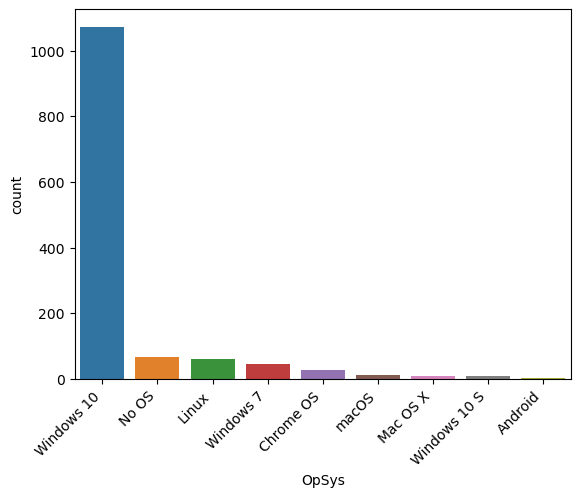

In [23]:
sns.countplot(x='OpSys', data=df, order=df['OpSys'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.show()

#### 4.1.2 Histogram & KDE

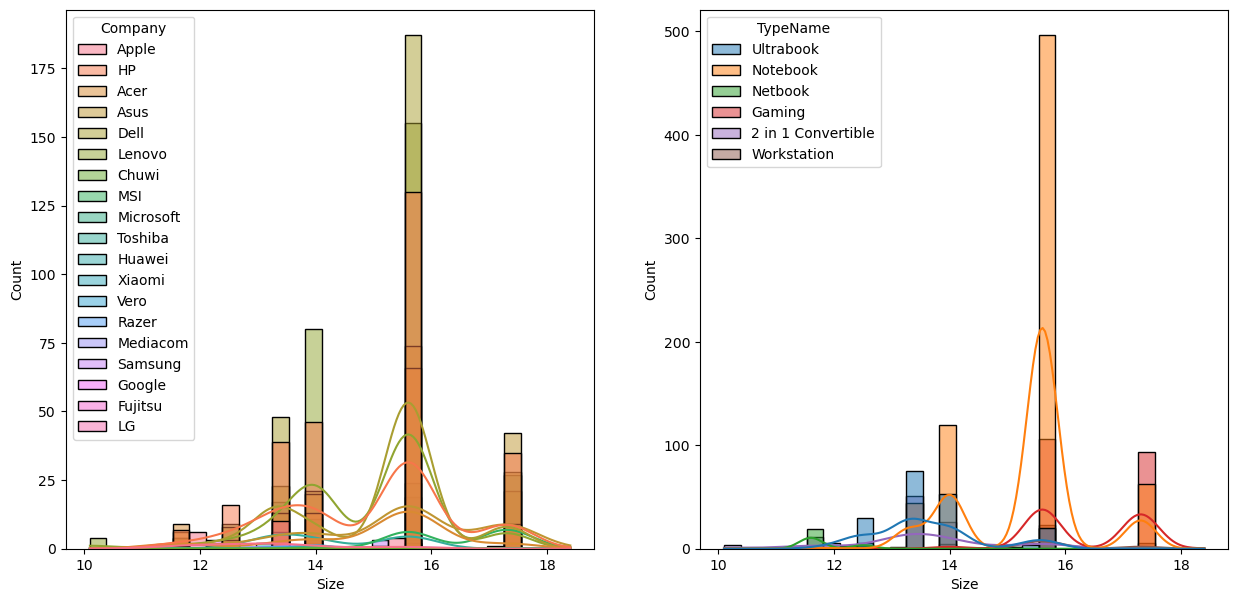

In [24]:
# size
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Size',kde=True,hue='Company')
plt.subplot(122)
sns.histplot(data=df,x='Size',kde=True,hue='TypeName')
plt.show()

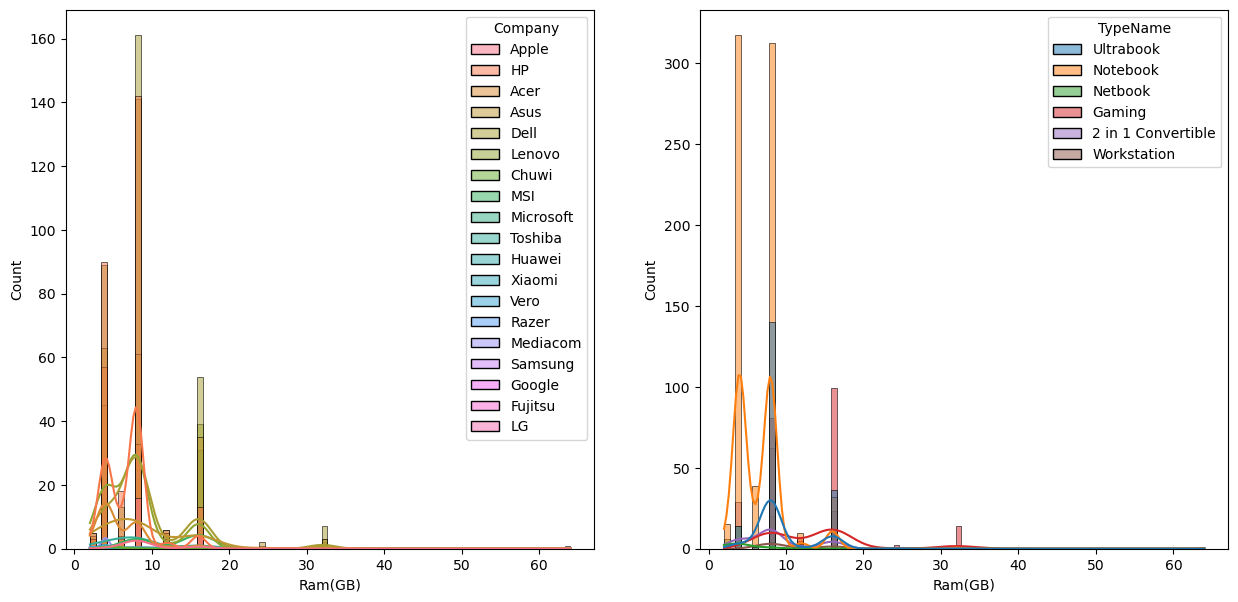

In [25]:
# Ram(GB)
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Ram(GB)',kde=True,hue='Company')
plt.subplot(122)
sns.histplot(data=df,x='Ram(GB)',kde=True,hue='TypeName')
plt.show()

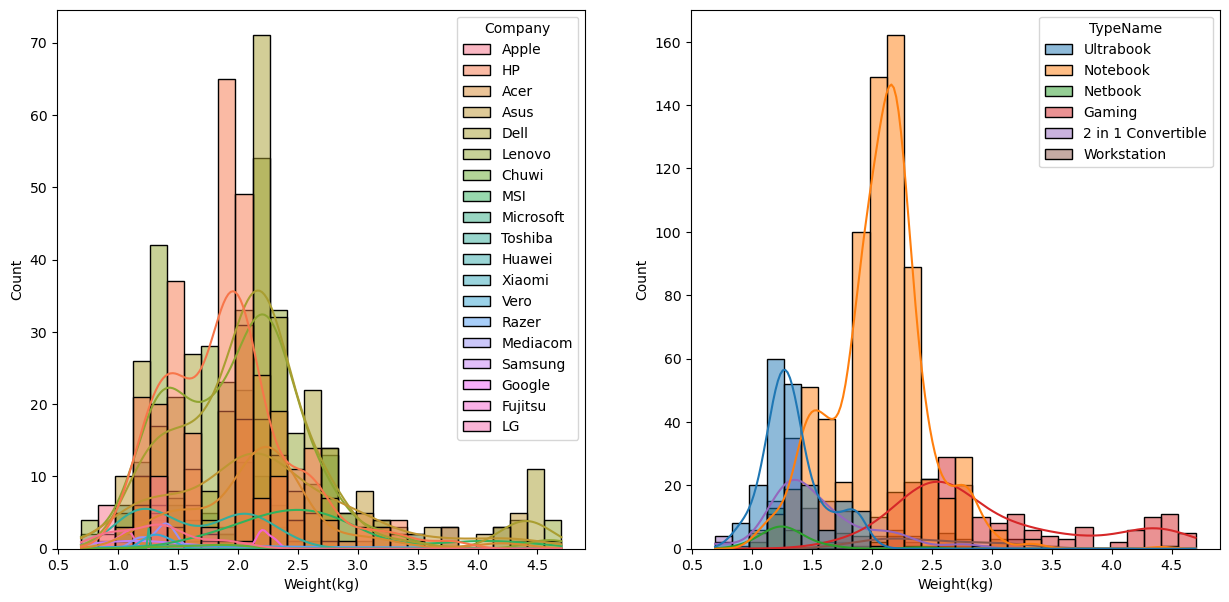

In [26]:
# Weight(kg)
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Weight(kg)',kde=True,hue='Company')
plt.subplot(122)
sns.histplot(data=df,x='Weight(kg)',kde=True,hue='TypeName')
plt.show()

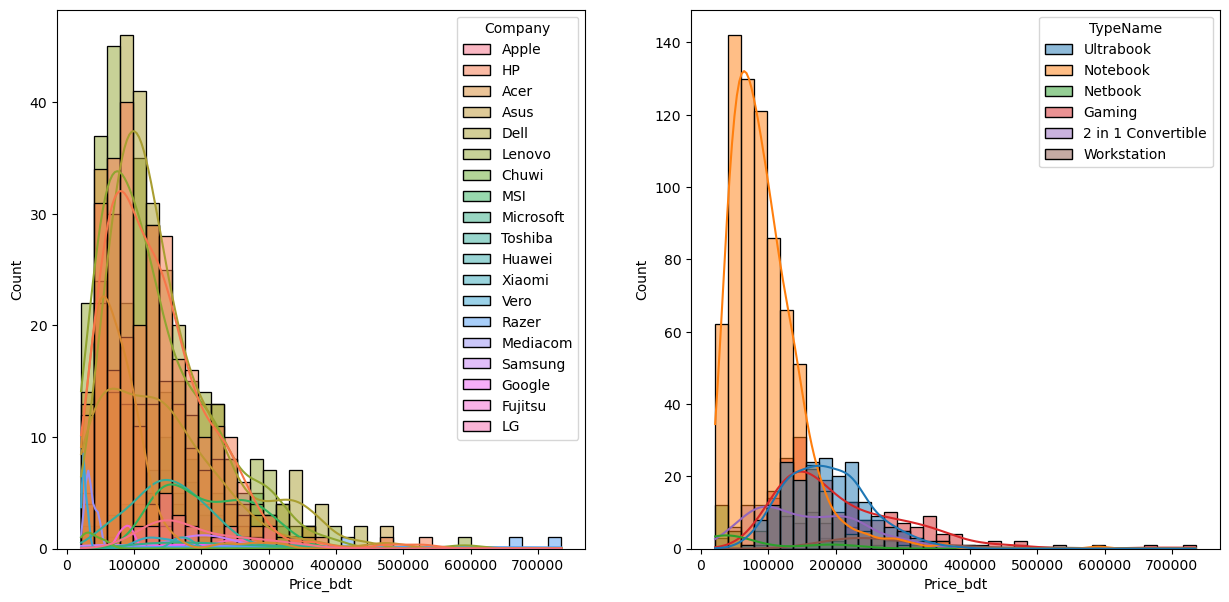

In [27]:
# Price_bdt
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Price_bdt',kde=True,hue='Company')
plt.subplot(122)
sns.histplot(data=df,x='Price_bdt',kde=True,hue='TypeName')
plt.show()

#### 4.2 Maximum values in numerical columns

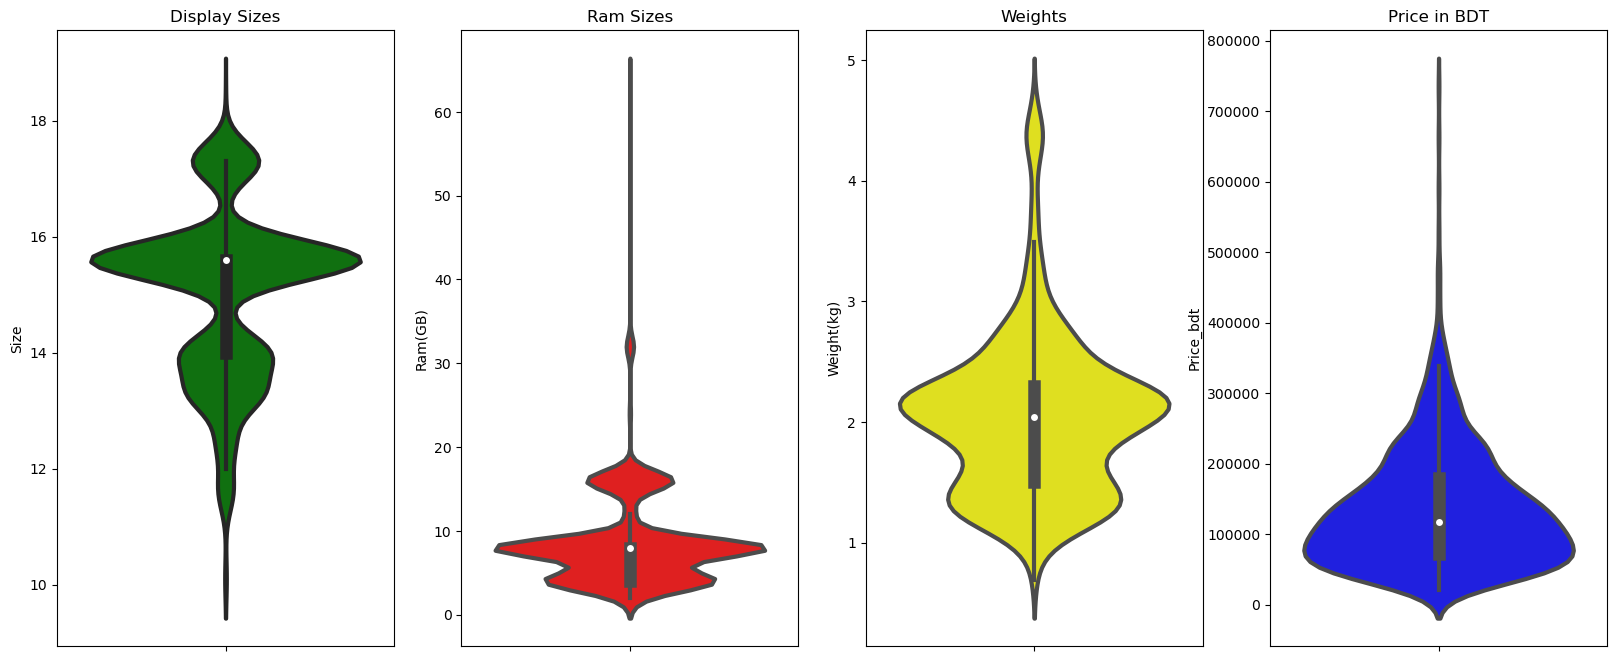

In [37]:
plt.figure(figsize=(20,8))
plt.subplot(1, 4, 1)
plt.title('Display Sizes')
sns.violinplot(y='Size',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Ram Sizes')
sns.violinplot(y='Ram(GB)',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Weights')
sns.violinplot(y='Weight(kg)',data=df,color='yellow',linewidth=3)
plt.subplot(1, 4, 4)
plt.title('Price in BDT')
sns.violinplot(y='Price_bdt',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above four plots its clearly visible that most of the Display size are between 15-16 inches, rams are between 4-8 GB, Weights are between 2-2.5 kg and prices are between 50k-100k

#### BIVARIATE ANALYSIS ( Does Company have any impact on Laptop prices ? ) 

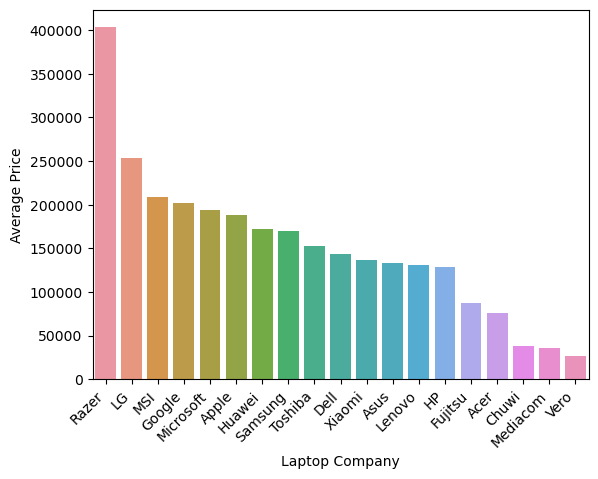

In [68]:
company_group = df.groupby('Company').mean().reset_index()
company_group_sorted = company_group.sort_values(by='Price_bdt', ascending=False)
sns.barplot(x='Company', y='Price_bdt', data=company_group_sorted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Laptop Company')
plt.ylabel("Average Price")
plt.show()

#### Insights
- From the above four plots its clearly visible that Razer creates the most costly laptops and the least costly laptops are from Vero.

#### 4.3 BIVARIATE ANALYSIS ( Does Laptop type have any impact on Laptop prices ? ) 

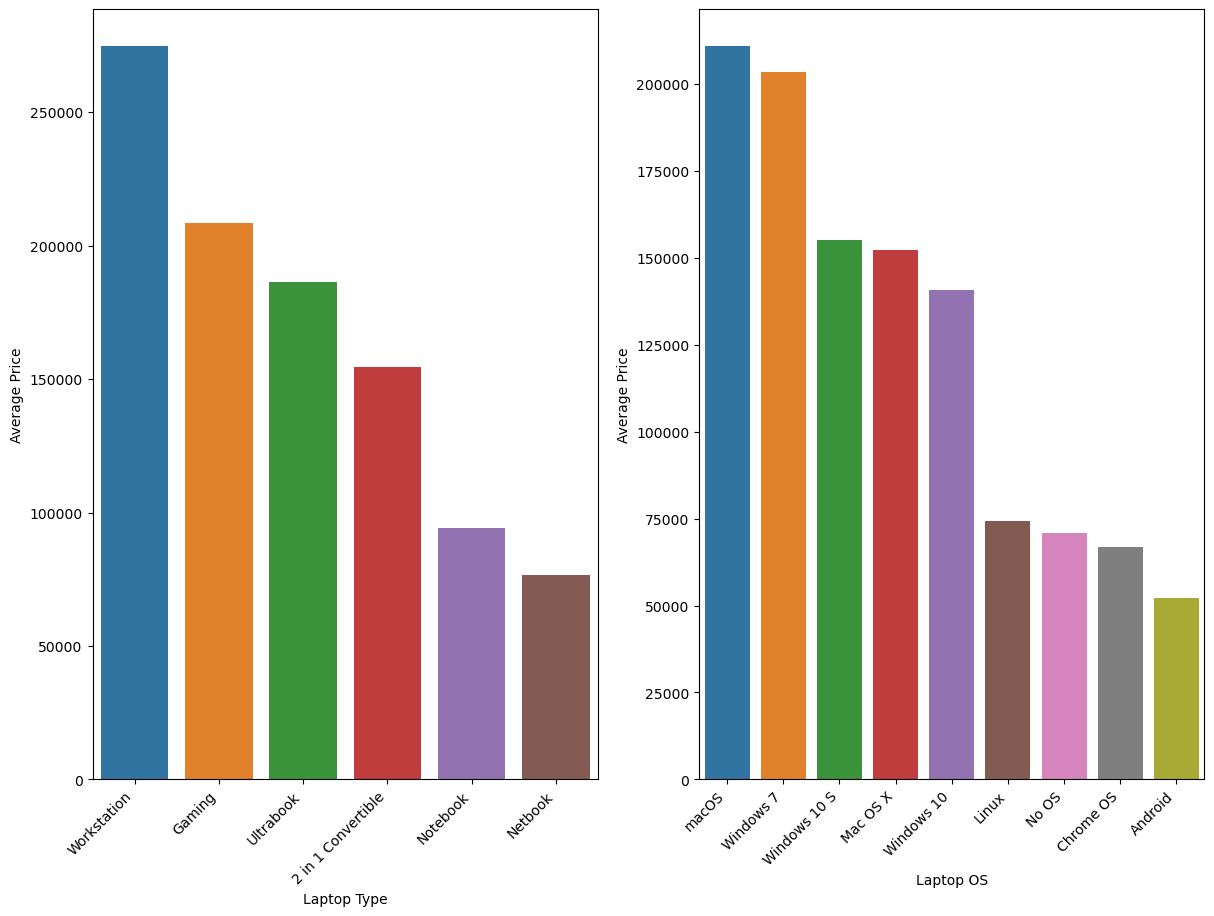

In [66]:
plt.figure(figsize=(30,10))
plt.subplot(1,4,1)
type_group = df.groupby('TypeName').mean().reset_index()
type_group_sorted = type_group.sort_values(by='Price_bdt', ascending=False)
sns.barplot(x='TypeName', y='Price_bdt', data=type_group_sorted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Laptop Type')
plt.ylabel("Average Price")

plt.subplot(1,4,2)
os_group = df.groupby('OpSys').mean().reset_index()
os_group_sorted = os_group.sort_values(by='Price_bdt', ascending=False)
sns.barplot(x='OpSys', y='Price_bdt', data=os_group_sorted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Laptop OS')
plt.ylabel("Average Price")
plt.show()

#### Insights
- Workstations and gaming laptops are most costly while Netbook and Notebooks are least costly
- macOS are the most expensive operating system there where Android is the least expensive

#### 4.4 CHECKING OUTLIERS

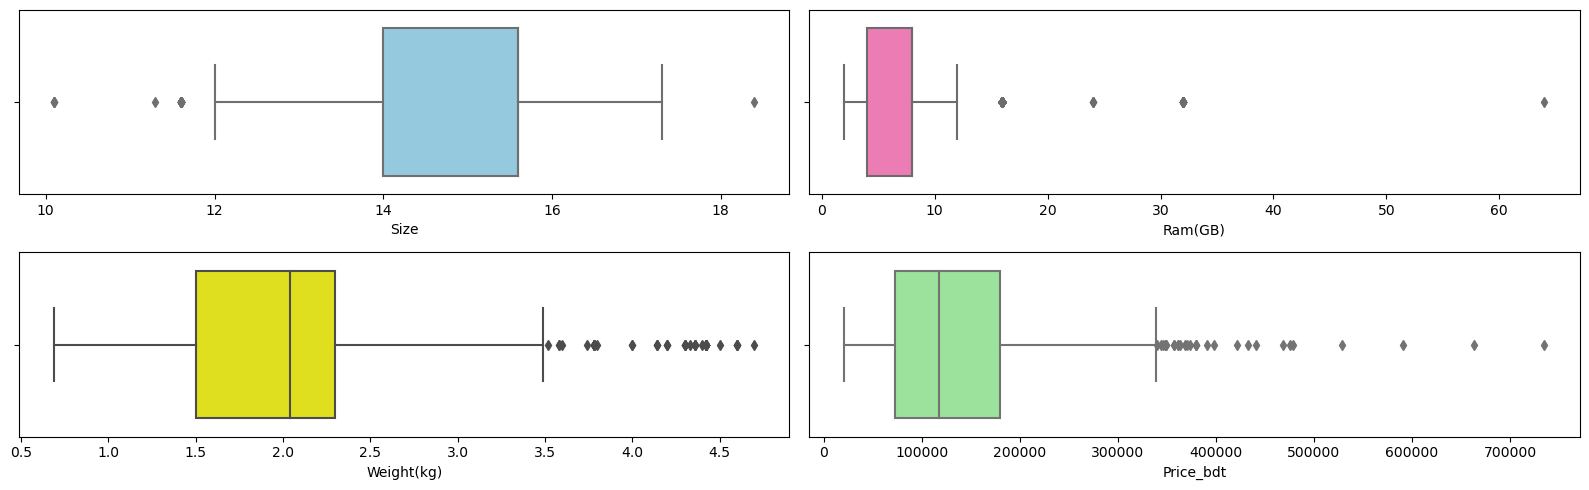

In [76]:
fig, axes = plt.subplots(2, 2, figsize=(16, 5))
sns.boxplot(df['Size'], color='skyblue', ax=axes[0, 0])
sns.boxplot(df['Ram(GB)'], color='hotpink', ax=axes[0, 1])
sns.boxplot(df['Weight(kg)'], color='yellow', ax=axes[1, 0])
sns.boxplot(df['Price_bdt'], color='lightgreen', ax=axes[1, 1])
plt.tight_layout()
plt.show()

#### 4.5 MUTIVARIATE ANALYSIS USING PAIRPLOT

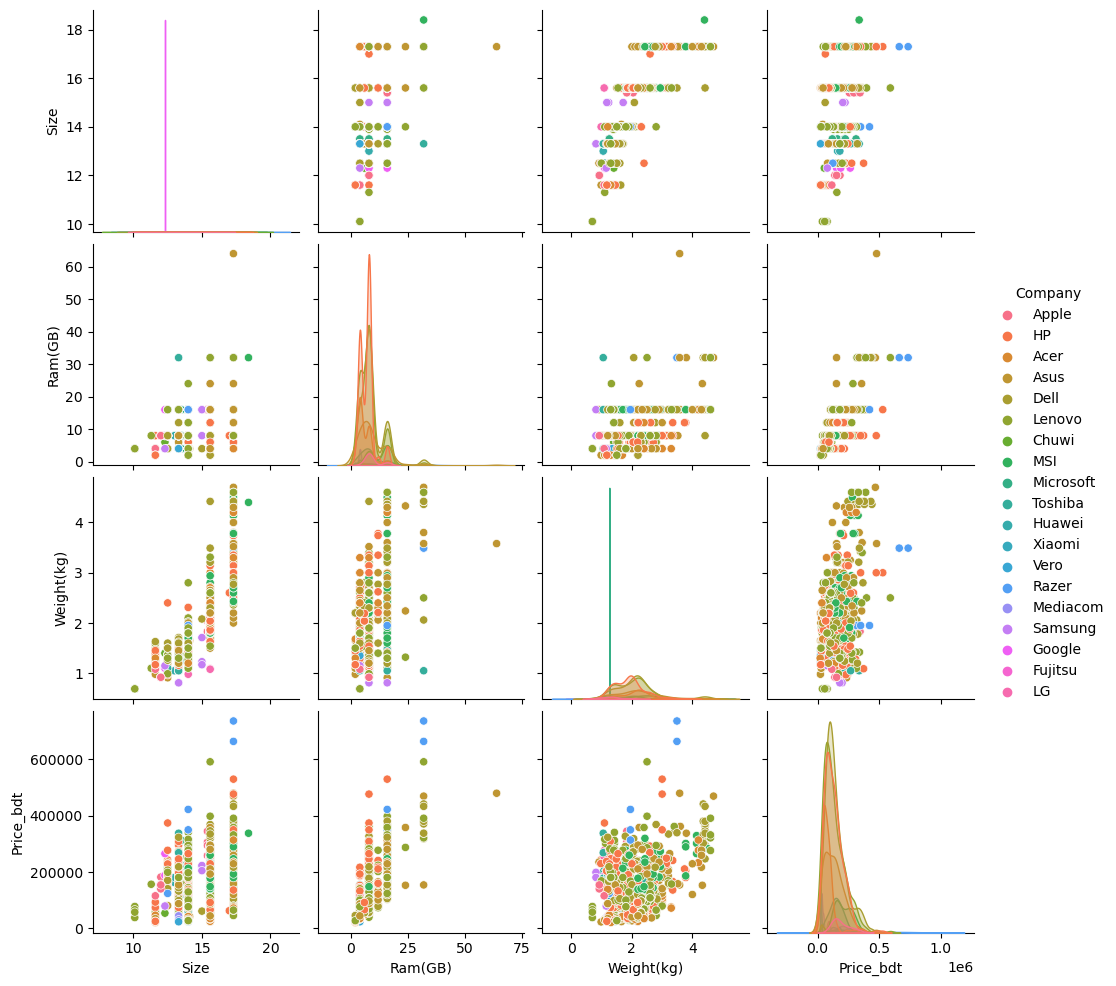

In [78]:
sns.pairplot(df,hue = 'Company')
plt.show()